In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
# normalization
scale = False

In [4]:
data = np.genfromtxt('LR-testSet2.txt',delimiter=',')

In [5]:
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

In [5]:
print(np.shape(x_data))

(118, 2)


In [7]:
print(np.shape(y_data))

(118, 1)


In [13]:
def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0 = plt.scatter(x0, y0, c='b', marker='x')
    scatter1 = plt.scatter(x1, y1, c='r', marker='o')
    
    plt.legend(handles=[scatter0,scatter1], labels=['label0','label1'], loc='best')

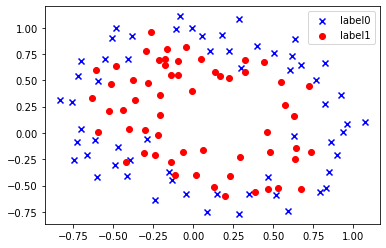

In [14]:
plot()

In [16]:
# 定义多项式回归
poly_reg = PolynomialFeatures(degree=3)

# 特征处理
x_poly = poly_reg.fit_transform(x_data)

In [17]:
print(x_poly)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  1.83865725e-03
   2.50892595e-02  3.42353606e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  5.89122275e-03
  -4.35092419e-02  3.21334672e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  3.16164171e-02
  -1.02411982e-01  3.31733166e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34520477e-01
  -4.83742961e-01  9.97811598e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.01206555e-05
  -6.32715223e-03  9.97811598e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ... -1.22523312e-02
   5.92852863e-04 -2.86863382e-05]]


In [19]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1 - yMat, np.log(1-sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))

def grad_descent(xArr, yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.03
    epochs = 50000
    costList = []
    # 计算数据的列数，有几列数据就有几个权值
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):
        # 给一个中间变量
        h = sigmoid(xMat*ws)
        # 计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [20]:
ws,costList = grad_descent(x_poly, y_data)
print(ws)

[[ 4.16787292]
 [ 2.72213524]
 [ 4.55120018]
 [-9.76109006]
 [-5.34880198]
 [-8.51458023]
 [-0.55950401]
 [-1.55418165]
 [-0.75929829]
 [-2.88573877]]


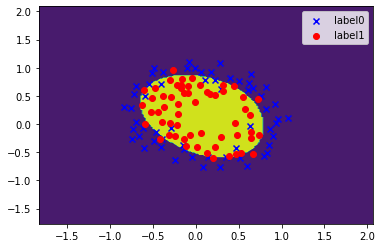

In [23]:
# plot
x_min, x_max = x_data[:,0].min() - 1, x_data[:,0].max() + 1
y_min, y_max = x_data[:,1].min() - 1, x_data[:,1].max() + 1

# create meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(np.array(ws)))

for i in range(len(z)):
    if z[i] > 0.5:
        z[i] = 1
    else:
        z[i] = 0
z = z.reshape(xx.shape)

# 等高线
cs = plt.contourf(xx, yy, z)
plot()
plt.show()

In [24]:
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

In [25]:
predictions = predict(x_poly, ws)

In [26]:
print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        60
         1.0       0.83      0.86      0.85        58

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118

